# Ejercicios tema 1 
Blanca Cano Camero


In [1]:
# import básicos
from sympy import * # Aunque en las prácticas se han realizado más yo no veo necesario más

## declaraciones
x = symbols("x")

### Ejercicio 1
1.- Demuestre que la ecuación $x^3+4 x^2=10$ tiene una única raíz en el intervalo $[1,2]$. Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas? Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea inferior a $10^{-3}$.

In [2]:
# La siguiente función se anula en donde la ecuación tiene solución
f = x**4 + 4*x**2 - 10

print(f'en f(2)={f.evalf(subs={x:2})} y f(1)={f.evalf(subs={x:1})}')

# análisis de la derivada
df = diff(f,x)
print(f'Los puntos donde se anula l aderiva son {solve(df)}')
print(f'en df(-1)={df.evalf(subs={x:-1})} y df(1)={df.evalf(subs={x:1})}')



en f(2)=22.0000000000000 y f(1)=-5.00000000000000
Los puntos donde se anula l aderiva son [0, -sqrt(2)*I, sqrt(2)*I]
en df(-1)=-12.0000000000000 y df(1)=12.0000000000000


Por ser f un polinomio (clase infinito) y  puesto que la derivada solo se anula en 0 y toma valores positivos en adelante; deducimos que la función $f$ es creciente a partir de 0. 

Además gracias al teorema de Bolzano sabemos que se anulará en un punto por ser $f(1)<0<f(2)$ continua y creciente en ese intervalo.

#### Consideraciones bisección

In [3]:
import biseccion as bis
# Para tres cifras decimales de precisión el error será (10**(-3))

n3 = bis.calcIterations(1,2,10**(-3))
n5 = bis.calcIterations(1,2,10**(-5))
print(f'El número mínimo de iteraciones para tres cifras es de {n3}')
print(f'El número mínimo de iteraciones para cinco cifras es de {n5}')

def f(x):
    return x**4+ 4*x**2 - 10

## Calculamos el valor de la raíz con bisección 
raiz, ms_salida = bis.bisection(f,1,2,10**(-5))
print(f'La solución buscada es {raiz}')

El número mínimo de iteraciones para tres cifras es de 10.0
El número mínimo de iteraciones para cinco cifras es de 17.0
La solución buscada es 1.3197250366210938


#### Consideraciones Newton-Raphson

In [4]:
from newtonRaphson import newtonRaphsonSinInicio
f = x**4 + 4*x**2 - 10
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,1,2,10**(-3))

print(f'La solución con newtonRapshon es {raiz}, que se ha alcanzado en {num_iter} iteraciones')

La solución con newtonRapshon es 1.3197190191327715, que se ha alcanzado en 4 iteraciones


## Ejercicio 2

2.- Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos, usando el algoritmo de bisección.

In [5]:
#Esta función se anula en la raíz cúbica de 25 
f = x**3 -25


print(f'en f(2)={f.evalf(subs={x:2})} y f(3)={f.evalf(subs={x:3})}')

# análisis de la derivada
df = diff(f,x)
print(f'Los puntos donde se anula la aderiva son {roots(df)}')
print(f'en df(-1)={df.evalf(subs={x:-1})} y df(1)={df.evalf(subs={x:1})}')



en f(2)=-17.0000000000000 y f(3)=2.00000000000000
Los puntos donde se anula la aderiva son {0: 2}
en df(-1)=3.00000000000000 y df(1)=3.00000000000000


Por tanto (Como era completamente de esperar) la función es creciente a partir de 0 y gracias a bolzano en la semirecta real positiva existirá una única solución.

In [6]:
#la calculamos por bisección
def f(x):
    return x**3 -25

## Calculamos el valor de la raíz con bisección 
raiz, ms_salida = bis.bisection(f,2,3,10**(-2))
print(f'La solución buscada es {raiz} donde (25^(1/3)= {25**(1/3)}) ')

La solución buscada es 2.9296875 donde (25^(1/3)= 2.924017738212866) 


## Ejercicio 3

3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con precisión $10^{-5}$ , partiendo de
un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10 cos x+x=0$.


#### i) $x^3-x-1 = 0$  en $[1,2]$.
$f(x) = x^3-x-1$
Su derivada es $x^2 -1$ positiva en tal intervalo y crecente, por tanto habrá una solucío a lo más. 
$f(1)<0<f(2)$ que por continuidad y bolzano tenemos la certeza de que la solución será única.

La función netonRaphsonSinInicio directamente coloca la semilla en su sitio usando el criterio de la segunda derivada. 

In [7]:
from newtonRaphson import newtonRaphsonSinInicio
f = x**3-x-1
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,1,2,10**(-5), 10**(-5))
print(f'La solución buscada es {raiz}')

La solución buscada es 1.3247190494171253


#### ii) $3x=2+x^2-e^x$.

$x^2 -3x +2 =  e^x$

A ojo, casi sin querer se ve que $x^2 -3x +2 = (x-1)(x-2)$
por tanto sabemos que la parábola tomará valores negarivos entre $(1,2)$ y sabemos que la exponencial es estrictamente positiva y de crecimiento mucho más rápido,a partir de uno, antes de eso será aproximadamente 0.  así que de manera intuitiva habrá una solución en $(-\infty,1)$ cercana al uno. 

Puede comprobarse la intuición si representamos la función. 


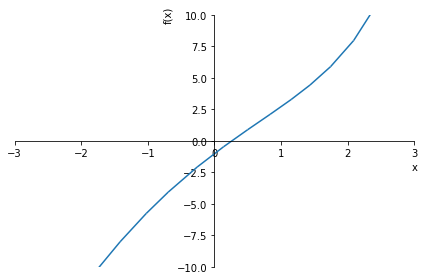

In [19]:
f = exp(x)-x**2 +  3*x -2
plot(f,ylim=(-10,10), xlim=(-3, 3))


Además la segunda derivada de $f=exp(x)-x**2 +  3*x -2$ será $f'' = exp(x) - 2$

Que en es positiva en 1 al igual que la función, así que aplicando el critero de los signos podemos partir de 1 que con el método de newton raphson será convergente. 

Vamos a ellos: 


In [9]:
from newtonRaphson import newtonRaphson
f=exp(x)-x**2 +  3*x -2
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,1,10**(-5), 10**(-5))
print(f'La solución buscada es {raiz}, se han realizado {num_iter} iteraciones')

La solución buscada es 0.2575302854263488, se han realizado 4 iteraciones


#### iii) $x^2+10 cos x+x=0$.

En este caso tenemos que tener más cuidado, porque tenemos una parábola $x(x+1)$ y una función periódica, por tanto a lo sumo podemos tener dos soluciones y no queremos dejarnos ninguna. 

Pero vamos a aprovechar las herraminetas gráficas para ver el número de solucionesy su intervalo.

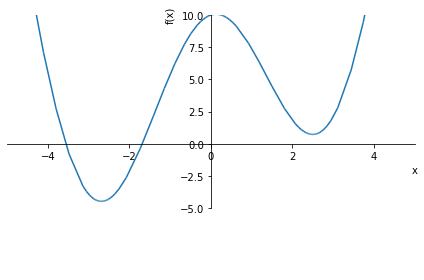

In [10]:
f = x**2 + 10*cos(x) + x
plot(f,ylim=(-10,10), xlim=(-5, 5))

Podemos ver que existen dos soluciones, cada respectivamente en $(-4,-3)$ y $(-2, -1)$, así que ya estamos preparados para utilizar nuestra implementación de Newton-Raphson. 

In [11]:
from newtonRaphson import newtonRaphsonSinInicio
f = x**2 + 10*cos(x) + x
raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,-2,-1,10**(-5), 10**(-5))
print(f'La solución entre (-2,-1)buscada es {raiz},que se ha alcanzado por {ms_salida}, en  {num_iter} iteraciones.')

raiz, ms_salida, num_iter = newtonRaphsonSinInicio(f,-4,-3,10**(-5), 10**(-10))
print(f'La solución entre (-4,-3)buscada es {raiz}  por {ms_salida}, en  {num_iter} iteraciones.')

La solución entre (-2,-1)buscada es -1.6869398658093508,que se ha alcanzado por precision, en  4 iteraciones.
La solución entre (-4,-3)buscada es -3.5623314972388327  por tolerancia, en  4 iteraciones.


## Ejercicio 4

4.- Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos, y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$,
partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

### Solución


In [12]:

# BISECCIÓN
import biseccion as bis
# Para cuatro cifras decimales de precisión el error será (10**(-4))
n4 = bis.calcIterations(0,1,10**(-4))
print('Bisección')
print(f'El número mínimo de iteraciones en bisección para cuaro cifras será de {n3}')


def f(x):
    return 3* x**2 + exp(x)-1

## Calculamos el valor de la raíz con bisección 
raiz, ms_salida = bis.bisection(f,0,1,10**(-4))
print(f'La solución a priori con bisección es {raiz}')


## NEWTON-RAPHSON
from newtonRaphson import newtonRaphson
f  = 3* x**2 + exp(x)-1
raiz, ms_salida, num_iter = newtonRaphson(f,0,10**(-4), 10**(-4))
print(f'NEWTON-RAPHSON: La solución buscada es {raiz} con {num_iter} iteraciones.')

Bisección
El número mínimo de iteraciones en bisección para cuaro cifras será de 10.0
La solución a priori con bisección es 6.103515625e-05
NEWTON-RAPHSON: La solución buscada es 0.0 con 1 iteraciones.


## Ejercicio 5
5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.
### caso i

In [13]:
fi = x**7 - x**4 +2

print(f'Las soluciones reales y complejas de {fi} son:')
complexN = solve(fi, x)
for i in complexN:
    print(N(i))
 


Las soluciones reales y complejas de x**7 - x**4 + 2 son:
-1.00000000000000
-0.713102145851293 - 0.98823188827156*I
-0.713102145851293 + 0.98823188827156*I
1.06110281046036 - 0.376384046559108*I
1.06110281046036 + 0.376384046559108*I
0.151999335390936 - 1.01945594669063*I
0.151999335390936 + 1.01945594669063*I


### caso ii
Hemos representado esta función en el intervalo $[-2.5,2.5]$ para valores fuera de ese intervalo no existe ninguna solución, pues el coseno tiene una amplitud de 1 y en para valores $N < -2.5$ se tiene que $N^7 -3 < -1 <-cos(N)$ y apara $N> 2.5$ se tiene que $N^7>4 > - cos(N) + 3$ 

Además la solución estará próxima a 1, un dato ideal para utilzar `nsolve`.

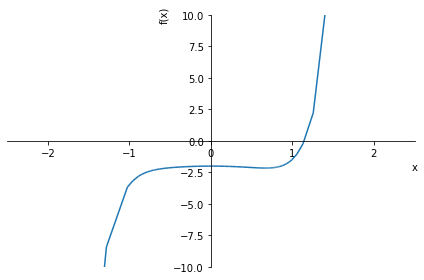

La raíz para x**7 + cos(x) - 3 es 1.14545980727001


In [14]:
# segunda
fii = x**7 + cos(x) -3
plot(fii, xlim=(-2.5,2.5), ylim=(-10, 10) )
# Por tanto calcula la única solución 
sol = nsolve(fii, 1)

print(f'La raíz para {fii} es {sol}')

## Ejercicio 6
 6.- Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen a las sucesiones obtenidas para los distintos métodos
programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

In [15]:
# cada tupla contiene la función f de cada ejercicio, la semilla inicial 
import aceleracionConvergencia as ac
#f=[(x**4 + 4*x**2 - 10,1),(x**3 -25,2),(x**3-x-1,1),(exp(x)-x**2 +  3*x -2,0),
 #(x**2 + 10*cos(x) + x,-2),(1,3* x**2 + exp(x)-1), (x**7 - x**4 +2,0),(x**7 + cos(x) -3,-1)]
f =[(x**4 + 4*x**2 - 10,1),(exp(x)-x**2 +  3*x -2,0)]

for i in range(len(f)):
    gaux=[(10/(x*(x+4)),1),((x**2+2-exp(x))/3,1.4)]
    def g(y):
        return gaux[i][0].evalf(subs={x:y})
    print(f'La aceleración de {f[i][0]} con semilla {gaux[i][1]} en {gaux[i][0]}:')
    ac.tablasAceleracion(g,gaux[i][1])


La aceleración de x**4 + 4*x**2 - 10 con semilla 1 en 10/(x*(x + 4)):
Xn                        | Aitken                 |Stepheson 
1                         |                        | 
2.00000000000000          |                        | 
0.833333333333333         | 1.46153846153846       | 
2.48275862068966          | 1.51666666666667       | 
0.621306146572104         | 1.37815034468775       | 1.37815034468775
3.48280861316797          | 1.34654507131928       | 1.34654507131928
0.383712328149617         | 1.41935299784799       | 1.41935299784799
5.94500467589520          | 1.29391242913432       | 1.29391242913432
0.169138629713219         | 1.59554139423208       | 1.59554139423208
14.1811305766207          | 1.04384454082576       | 1.04384454082576
0.0387853985175662        | 2.35352259823629       | 2.35352259823629
63.8382487052382          | -0.974754625444874     | -0.974754625444874
0.00230910886112447       | 5.88011667047837       | 5.88011667047837
La aceleración de -

## Ejercicio 7
 7.- Programar el método de Newton-Raphson acelerado para el caso de una raíz múltiple de una ecuación y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración anteriores.

### Solución

Lo que relentiza el método de convergencia Newton-Raphson para $f(x)$ son sus raíces múltiples, pero la función $\mu(x) = f(x)/f'(x)$ tiene las misma raíces y ninguna múltiple,  así que será tan sencillo como aplicarle Newton-Raphson a esa función. 

In [16]:
import  newtonRaphson as nr

f = (x-2)*(x-2)

#método sin acelerar 
raiz,mensaje, iteraciones = nr.newtonRaphson(f,100,max_iter=4)

print(f'Para el método tradicional la solución es {raiz}, tras {iteraciones} iteraciones')

df = 2*(x-2)
m = simplify(f/df)

raiz,mensaje, iteraciones = nr.newtonRaphson(m,100, max_iter=4)

print(f'Para el método acelerado la solución es {raiz}, tras {iteraciones} iteraciones')

Para el método tradicional la solución es 14.25, tras 4 iteraciones
Para el método acelerado la solución es 2.0, tras 4 iteraciones


## Ejercicio 8 

 8.- Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del
desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo.

### Solución

  El algoritmo de Horner se basa en sacar factor común $x$ para ahorrarse multiplicaciones, es decir si nuestro polinomio es de la forma $p = \sum_{i=0}^n \alpha_i x^i$ entonces el algoritmo de Horner sería, definimos $H(\alpha_i) = \alpha_i + x H(\alpha_{i+1})$, con $H(\alpha_n)=\alpha_n x$ sería $p =H(\alpha_0)$. 
  
 Si ahora queremos calcular la derivada $d$ del polinomio expresado;
 
 
 para todo $i \geq d$
Definimos $H_d(\alpha_i) = \frac{i!}{(i-d)!} \alpha_i + x H_d(\alpha_{i+1})$,  con 
 $H_d(\alpha_n)=\frac{n!}{(n-d)!}\alpha_n x$ y sería $p =H_d(\alpha_d)$. 

In [17]:
n=4
a = list(symbols('a0:'+ str(n)))
def horner(x,coef, d = 0):
    
    n = len(coef)
    salida = 0
    for i in range(n,d,-1):
        salida = factorial(i-1)/factorial(i-d-1)*coef[i-1] + x*salida

        
    return salida

for i in range(n+1):
    print(f' derivada {i}: {horner(x,a,i)}')


 derivada 0: a0 + x*(a1 + x*(a2 + a3*x))
 derivada 1: a1 + x*(2*a2 + 3*a3*x)
 derivada 2: 2*a2 + 6*a3*x
 derivada 3: 6*a3
 derivada 4: 0


#### Newton con horner

